In [79]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img 
from tensorflow.keras import layers, models
import os
import cv2

model parameters

In [80]:
epochs_num = 100
batch_sizes = 128
verbose_val = 1

create data path

In [81]:
train_data_path ='dataset/train/'
validation_data_path ='dataset/validation/'

check list of data folder in training data and testing data files

In [82]:
for emotion in os.listdir(train_data_path):
    print(emotion, " ", len(os.listdir(train_data_path + emotion)))

angry   3993
disgust   436
fear   4103
happy   7164
neutral   4982
sad   4938
surprise   3205


check total number of the data

In [83]:
x = 0
for emotion in os.listdir(train_data_path):
    print(emotion, " ", len(os.listdir(train_data_path + emotion)))
    x = x + len(os.listdir(train_data_path + emotion))
print('total training data size', x)

angry   3993
disgust   436
fear   4103
happy   7164
neutral   4982
sad   4938
surprise   3205
total training data size 28821


In [84]:
x = 0
for emotion in os.listdir(validation_data_path):
    print(emotion, " ", len(os.listdir(validation_data_path + emotion)))
    x = x + len(os.listdir(validation_data_path + emotion))
print('total validation data size', x)

angry   960
disgust   111
fear   1018
happy   1825
neutral   1216
sad   1139
surprise   797
total validation data size 7066


extract emotion categories

In [85]:
categories = []
for emotion in os.listdir(validation_data_path):
    data = [emotion]
    categories.append(data)


In [86]:
categories

[['angry'],
 ['disgust'],
 ['fear'],
 ['happy'],
 ['neutral'],
 ['sad'],
 ['surprise']]

print some images

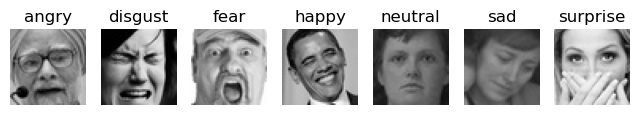

In [87]:
i = 1
plt.figure(figsize=(8,8))
for emotion in os.listdir(train_data_path):
    Images = load_img((train_data_path +emotion) + '/' + os.listdir(train_data_path +emotion)[1])
    plt.subplot(1, 7, i)
    plt.imshow(Images)
    plt.title(emotion)
    plt.axis('off')
    i = i+1

load training dataset into array and perform data augumentation

In [88]:
train_data_gene = ImageDataGenerator()

train_dataset = train_data_gene.flow_from_directory( 
                                train_data_path,
                                shuffle=True,
                                target_size =(48,48),
                                color_mode = 'grayscale',
                                class_mode = 'categorical',
                                batch_size = 128)                   
                                                


Found 28821 images belonging to 7 classes.


load validation dataset into array and perform data augumentation

In [89]:
validation_data_gene = ImageDataGenerator()

validation_dataset = validation_data_gene.flow_from_directory( 
                                validation_data_path,
                                shuffle=False,
                                target_size =(48,48),
                                color_mode = 'grayscale',
                                class_mode = 'categorical',
                                batch_size = 128)                   
                                                


Found 7066 images belonging to 7 classes.


model creation

In [90]:
model = models.Sequential()

model.add(layers.Conv2D(64, (3,3), padding = 'same', activation='relu', input_shape=(48,48,1)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128, (3,3), padding = 'same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(512, (3,3), padding = 'same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())

model.add(layers.Dense(128))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.25))

model.add(layers.Dense(256))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.25))

model.add(layers.Dense(7, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_10 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 24, 24, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 128)       73856     
                                                                 
 batch_normalization_11 (Bat  (None, 24, 24, 128)     

compile the model

In [91]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

fir model

In [92]:
model.fit(train_dataset, validation_data=validation_dataset, epochs=epochs_num, batch_size=batch_sizes, verbose=verbose_val)

Epoch 1/100
226/226 [==============================] - 19s 74ms/step - loss: 1.7061 - accuracy: 0.3437 - val_loss: 1.4799 - val_accuracy: 0.4367
Epoch 2/100
226/226 [==============================] - 16s 72ms/step - loss: 1.3635 - accuracy: 0.4769 - val_loss: 1.3478 - val_accuracy: 0.4956
Epoch 3/100
226/226 [==============================] - 17s 76ms/step - loss: 1.2133 - accuracy: 0.5363 - val_loss: 1.1992 - val_accuracy: 0.5449
Epoch 4/100
226/226 [==============================] - 17s 73ms/step - loss: 1.1163 - accuracy: 0.5754 - val_loss: 1.1937 - val_accuracy: 0.5522
Epoch 5/100
226/226 [==============================] - 17s 74ms/step - loss: 1.0324 - accuracy: 0.6105 - val_loss: 1.3762 - val_accuracy: 0.4639
Epoch 6/100
226/226 [==============================] - 17s 77ms/step - loss: 0.9557 - accuracy: 0.6415 - val_loss: 1.1448 - val_accuracy: 0.5768
Epoch 7/100
226/226 [==============================] - 17s 73ms/step - loss: 0.8837 - accuracy: 0.6713 - val_loss: 1.0981 - val_ac

Save trained model

In [93]:
model.save('model/human_emotion_classifier.keras')

load saved model

In [94]:
model = tf.keras.models.load_model('model/human_emotion_classifier.keras')

test model with the data from online

In [107]:
img = cv2.imread('testData/imagesSurprise1.jpeg')[:,:,0]
img = cv2.resize(img,(48,48))
img = np.invert(np.array([img]))

predict given image class

In [108]:
output = model.predict(img)

1/1 [==============================] - 0s 15ms/step


In [109]:
predict_cat = categories[np.argmax(output)]

In [110]:
predict_cat[0]

'fear'